In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
# read data into memory
data_set = np.genfromtxt("hw04_data_set.csv", delimiter = ",", skip_header = 1)

# divide data set into two parts: training set and test set
X_training = data_set[0:150, 0]
X_test = data_set[150:, 0]
Y_training = data_set[0:150, 1].astype(int)
Y_test = data_set[150:, 1].astype(int)

# get number of classes and number of samples
K = np.max(data_set[:, 1].astype(int))
N = data_set.shape[0]

In [3]:
# parameters
bin_width = 0.37
origin = 1.5

maximum_value = max(X_training)

In [4]:
def calc_RMSE(y_pred):
    res = np.sqrt(np.sum(np.square(Y_test - y_pred)) / len(X_test))
    return res

## Regressogram

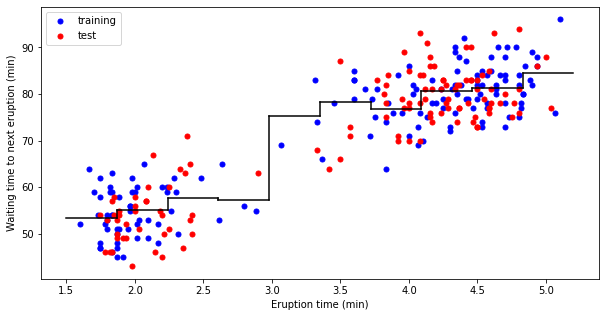

In [5]:
left_borders = np.arange(origin, maximum_value, bin_width)
right_borders = np.arange(origin + bin_width, maximum_value + bin_width, bin_width)

plt.figure(figsize = (10, 5))

# draw the data points
plt.plot(X_training, Y_training, 'b.', label = "training", markersize = 10)
plt.plot(X_test, Y_test, 'r.', label="test", markersize = 10)

# calculate p_hat values
p_hat = []
for i in range(len(left_borders)):
    p_hat.append(np.sum(((X_training > left_borders[i]) & (X_training <= right_borders[i])) * Y_training) / np.sum(((X_training > left_borders[i]) & (X_training <= right_borders[i]))))
p_hat = np.array(p_hat)

# draw the lines
for i in range(len(left_borders)):
    plt.plot([left_borders[i], right_borders[i]], [p_hat[i], p_hat[i]], "k-")

for i in range(len(right_borders)-1):
    plt.plot([right_borders[i], right_borders[i]], [p_hat[i], p_hat[i + 1]], "k-")

plt.xlabel("Eruption time (min)")
plt.ylabel("Waiting time to next eruption (min)")
plt.legend(loc = "upper left")
plt.show()

In [6]:
y_regressogram = np.zeros(len(X_test))
for i in range(len(X_test)):
    range_p = math.floor((X_test[i] - origin) / bin_width)
    y_regressogram[i] = p_hat[range_p]

rmse = calc_RMSE(y_regressogram)
print("Regressogram => RMSE is {} when h is {}".format(rmse, bin_width))

Regressogram => RMSE is 5.962617204275405 when h is 0.37


## Running Mean Smoother

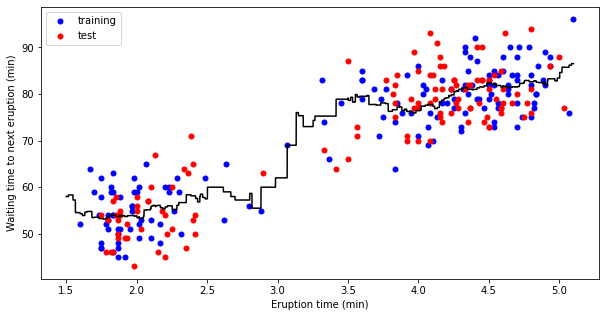

In [7]:
data_interval = np.arange(origin, maximum_value, 0.0001)

plt.figure(figsize = (10, 5))

# draw the data points
plt.plot(X_training, Y_training, 'b.', label = "training", markersize = 10)
plt.plot(X_test, Y_test, 'r.', label="test", markersize = 10)

# calculate p_hat values
p_hat = []
for x in data_interval:
    p_hat.append(np.sum((np.abs((x - X_training) / bin_width) <= 0.5) * Y_training) / np.sum((np.abs((x - X_training) / bin_width) <= 0.5)))
p_hat = np.array(p_hat)

plt.plot(data_interval, p_hat, "k-")

plt.xlabel("Eruption time (min)")
plt.ylabel("Waiting time to next eruption (min)")
plt.legend(loc = "upper left")
plt.show()

In [8]:
y_meansm = np.zeros(len(X_test))
for i in range(len(X_test)):
    y_meansm[i] = p_hat[round((X_test[i] - origin) * 10000)]

rmse = calc_RMSE(y_meansm)
print("Running Mean Smoother => RMSE is {} when h is {}".format(rmse, bin_width))

Running Mean Smoother => RMSE is 6.089003211720321 when h is 0.37


## Kernel Smoother

In [9]:
def K(u):
    res = 1/np.sqrt(2*np.pi) * np.exp(-u**2/2)
    return res

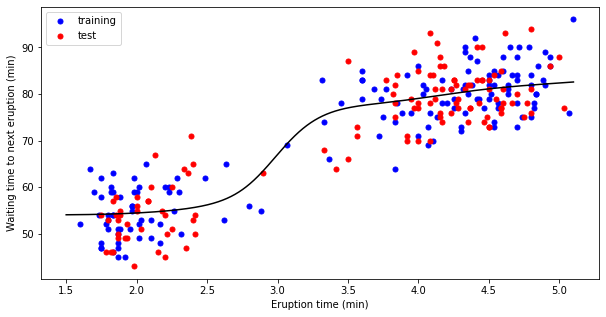

In [10]:
data_interval = np.arange(origin, maximum_value, 0.0001)

plt.figure(figsize = (10, 5))

# draw the data points
plt.plot(X_training, Y_training, 'b.', label = "training", markersize = 10)
plt.plot(X_test, Y_test, 'r.', label="test", markersize = 10)

# calculate p_hat values
p_hat = []
for x in data_interval:
    p_hat.append(np.sum(K((x - X_training) / bin_width) * Y_training) / np.sum(K((x - X_training) / bin_width)))
p_hat = np.array(p_hat)

plt.plot(data_interval, p_hat, "k-")

plt.xlabel("Eruption time (min)")
plt.ylabel("Waiting time to next eruption (min)")
plt.legend(loc = "upper left")
plt.show()

In [11]:
y_kernelsm = np.zeros(len(X_test))
for i in range(len(X_test)):
    y_kernelsm[i] = p_hat[round((X_test[i] - origin) * 10000)]

rmse = calc_RMSE(y_kernelsm)
print("Kernel Smoother => RMSE is {} when h is {}".format(rmse, bin_width))

Kernel Smoother => RMSE is 5.874362846844901 when h is 0.37
